# Xác định lỗi lượng tử của tín hiệu hình sin
- Tín hiệu $x(n) = \sin(2\pi f_0 n)$ với $f_0 = 1/50$, $N=200$.
- Lượng tử hóa với các mức: 64, 128, 256.
- Vẽ các tín hiệu $x(n)$, $x_q(n)$, $e(n)$ và tính tỷ lệ tín hiệu trên nhiễu (SQNR) tương ứng.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


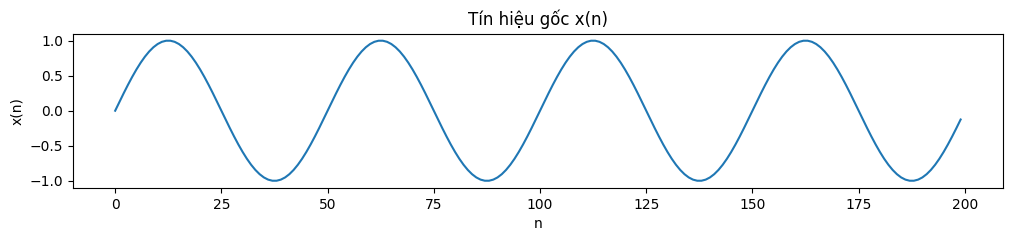

In [2]:
#Tạo tín hiệu gốc
f0 = 1/50
N = 200
n = np.arange(N)
x = np.sin(2*np.pi*f0*n)
plt.figure(figsize=(12, 2))
plt.plot(n,x)
plt.title('Tín hiệu gốc x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.show()


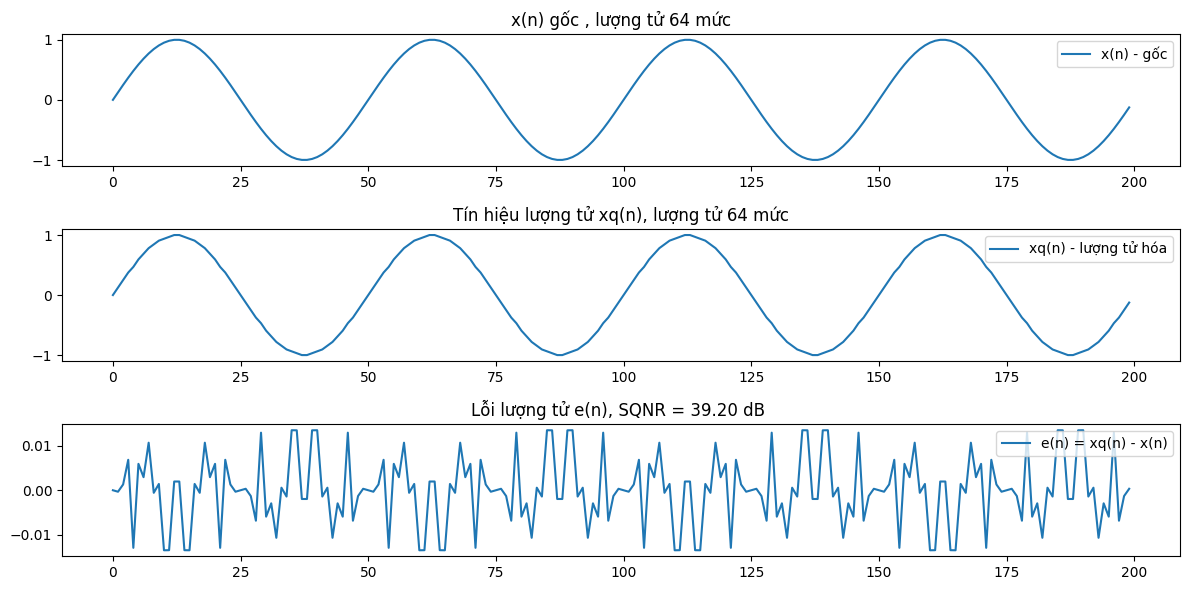

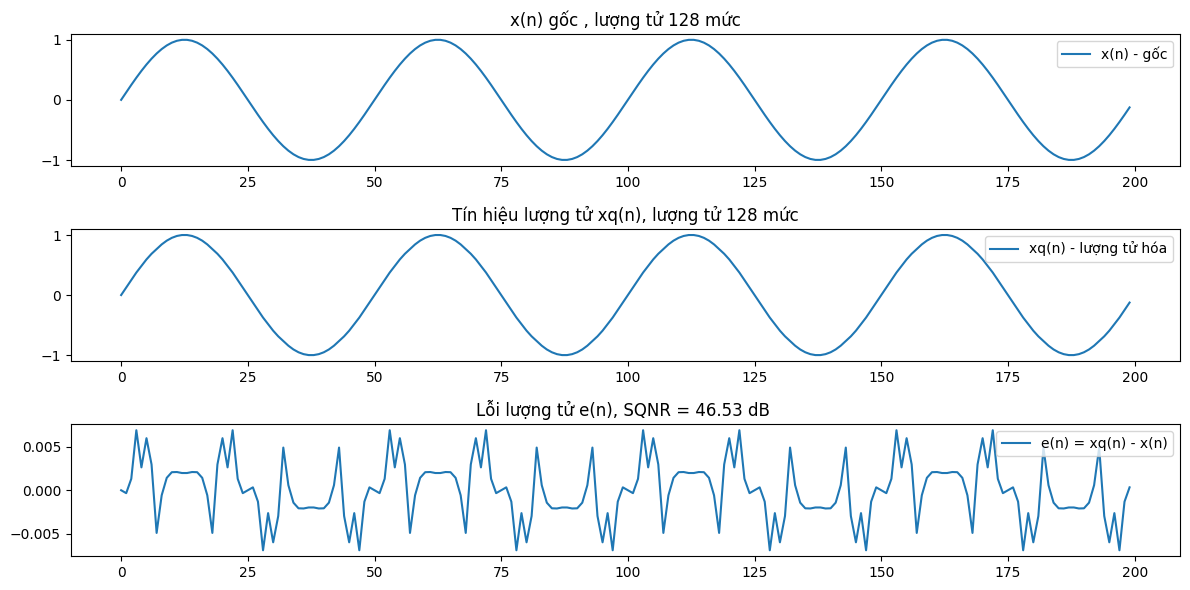

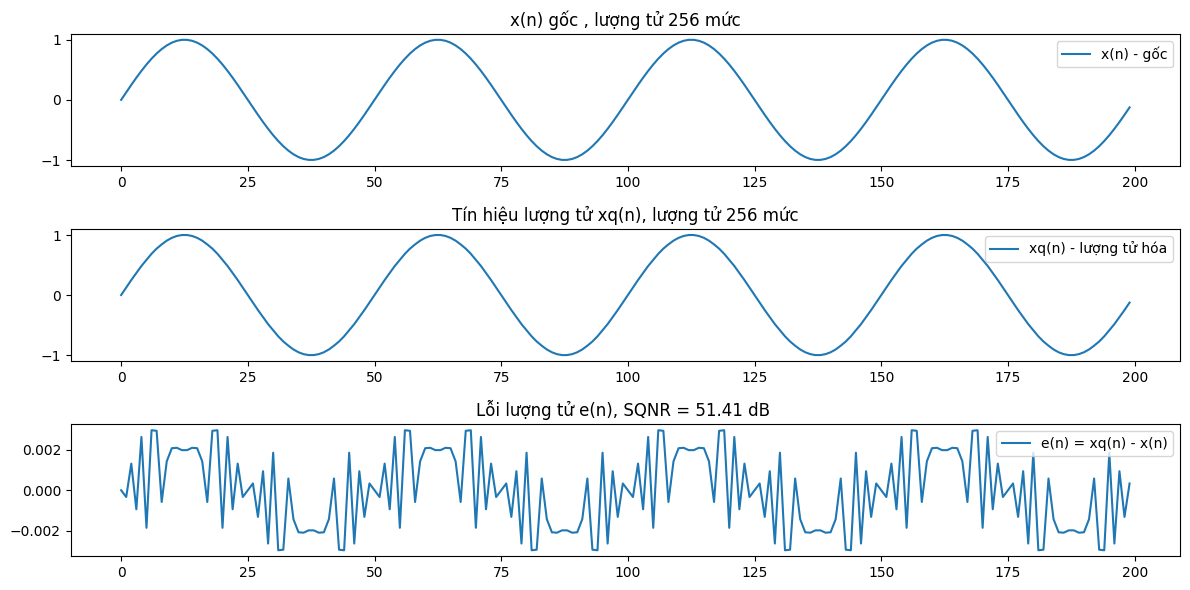

In [3]:
# Lượng tử hóa, vẽ x(n), xq(n), e(n), và tính SQNR cho từng mức
L_List = [64,128,256]
SQNRs = []
xmax = 1
xmin = -1

for L in L_List:
    delta = (xmax - xmin)/L
    xq = (np.round((x-xmin)/delta))*delta +xmin
    xq = np.clip(xq,xmin,xmax)
    e = xq - x
    Pq = np.mean(e**2)
    Px = np.mean(x**2)
    SQNR = 10 * np.log10(Px/Pq)
    SQNRs.append(SQNR)

    plt.figure(figsize=(12, 6))
    plt.subplot(3,1,1)
    plt.plot(n, x,label = 'x(n) - gốc')
    plt.title(f'x(n) gốc , lượng tử {L} mức')
    plt.legend()

    plt.subplot(3,1,2)
    plt.plot(n, xq, label = 'xq(n) - lượng tử hóa')
    plt.title(f'Tín hiệu lượng tử xq(n), lượng tử {L} mức')
    plt.legend()

    plt.subplot(3,1,3)
    plt.plot(n,e,label = 'e(n) = xq(n) - x(n)')
    plt.title(f'Lỗi lượng tử e(n), SQNR = {SQNR:.2f} dB ')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
#In SQRNs
for L in L_List:
    print(f'Lượng tử {L} mức, SQNR = {SQNR:.2f} dB')


Lượng tử 64 mức, SQNR = 51.41 dB
Lượng tử 128 mức, SQNR = 51.41 dB
Lượng tử 256 mức, SQNR = 51.41 dB
